In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from io import StringIO

In [3]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [4]:
#leer el archivo fraudTrain.csv
df = pd.read_csv('fraudTrain.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [17]:
df['is_fraud'].value_counts()

,count
is_fraud,
0,1289169
1,7506


In [21]:
#proporcion de fraude
df['is_fraud'].value_counts(normalize=True)*100

,proportion
is_fraud,
0,99.421135
1,0.578865


In [ ]:
# Crear un grafo vacío
G = nx.Graph()

# Agregar nodos y aristas al grafo
for index, row in df.iterrows():
    # Agregar nodos
    G.add_node(row['cc_num'], label='cc_num')
    G.add_node(row['merchant'], label='merchant')

    # Agregar arista entre cc_num y merchant con atributos is_fraud y weight
    G.add_edge(row['cc_num'], row['merchant'], is_fraud=row['is_fraud'], weight=row['amt'])

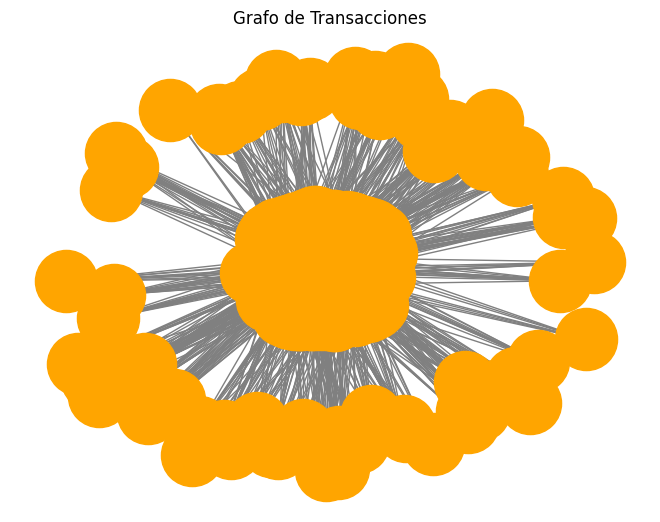

In [ ]:
# Dibujar el grafo
pos = nx.spring_layout(G)  # Posiciones de los nodos
nx.draw(G, pos, with_labels=False, node_color='orange', node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color='gray')

# Mostrar el grafo
plt.title("Grafo de Transacciones")
plt.show()

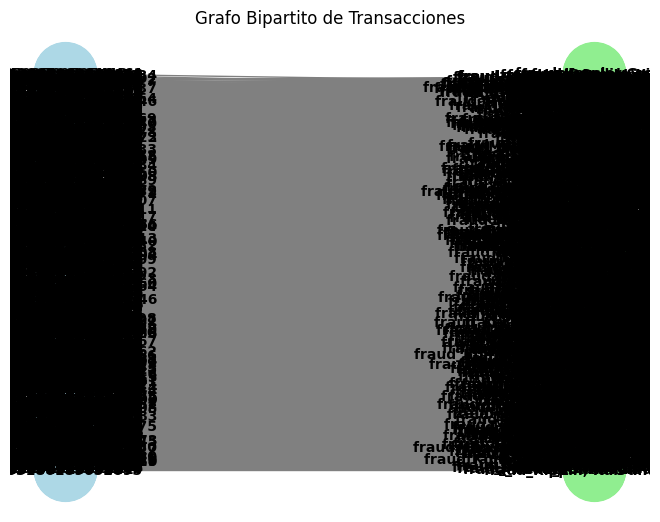

In [ ]:
#Crear un grafo bipartito
B = nx.Graph()

# Agregar nodos de tipo "cc_num" y "merchant"
for index, row in df.iterrows():
    B.add_node(row['cc_num'], bipartite=0)  # Nodos de tarjetas
    B.add_node(row['merchant'], bipartite=1)  # Nodos de comerciantes
    B.add_edge(row['cc_num'], row['merchant'])

# Dibujar el grafo bipartito
pos = nx.bipartite_layout(B, nodes=[n for n, d in B.nodes(data=True) if d['bipartite'] == 0])
nx.draw(B, pos, with_labels=True, node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in B.nodes(data=True)],
        node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color='gray')

# Mostrar el grafo
plt.title("Grafo Bipartito de Transacciones")
plt.show()

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

#Crear un grafo bipartito
B = nx.Graph()

# Agregar nodos de tipo "cc_num" y "merchant"
for index, row in df.iterrows():
    B.add_node(row['cc_num'], bipartite=0)  # Nodos de tarjetas
    B.add_node(row['merchant'], bipartite=1)  # Nodos de comerciantes
    B.add_edge(row['cc_num'], row['merchant'], is_fraud=row['is_fraud']) #, weight=row['amt'])

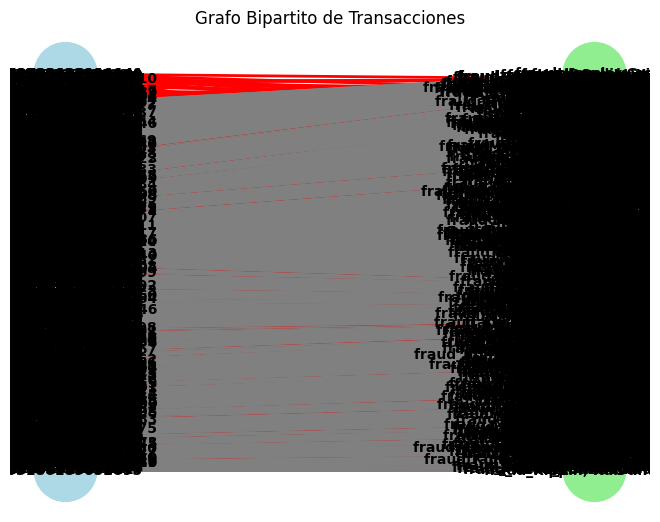

In [ ]:
# Dibujar el grafo bipartito
pos = nx.bipartite_layout(B, nodes=[n for n, d in B.nodes(data=True) if d['bipartite'] == 0])
edge_colors = ['red' if data['is_fraud'] == 1 else 'gray' for u, v, data in B.edges(data=True)]
nx.draw(B, pos, with_labels=True, node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in B.nodes(data=True)],
        node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors, width=2)


# Mostrar el grafo
plt.title("Grafo Bipartito de Transacciones")
plt.show()

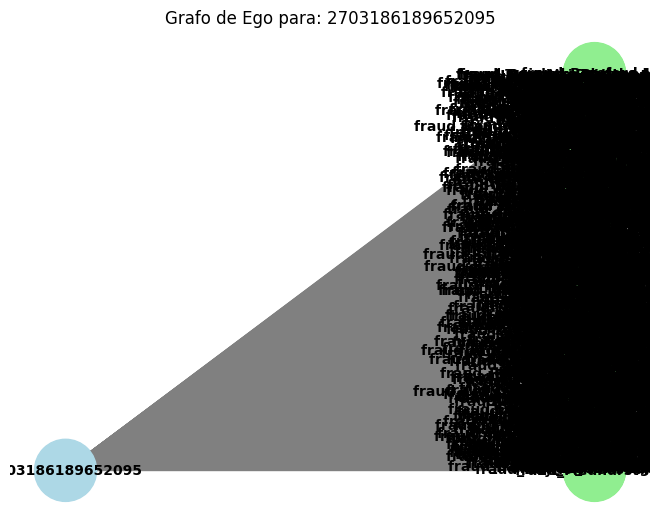

In [ ]:
ego_node = df['cc_num'].iloc[0]

# Crear el grafo de ego
ego_graph = nx.ego_graph(B, ego_node)

# Dibujar el grafo de ego
pos = nx.bipartite_layout(ego_graph, nodes=[n for n, d in ego_graph.nodes(data=True) if d['bipartite'] == 0])
edge_colors = ['red' if data['is_fraud'] == 1 else 'gray' for u, v, data in B.edges(data=True)]
nx.draw(ego_graph, pos, with_labels=True,
        node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in ego_graph.nodes(data=True)],
        node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors)

# Mostrar el grafo de ego
plt.title(f"Grafo de Ego para: {ego_node}")
plt.show()

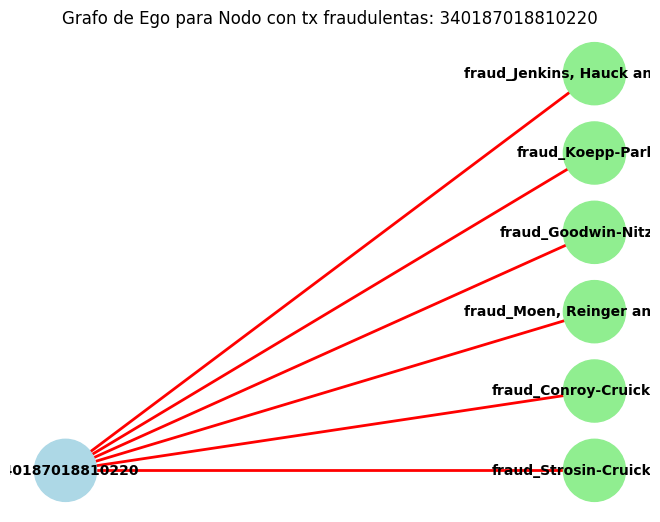

In [15]:
# Find a node with fraudulent transactions
fraudulent_nodes = df[df['is_fraud'] == 1]['cc_num'].unique()

ego_node = fraudulent_nodes[1]  # Select the first fraudulent node

# Create the ego graph
ego_graph = nx.ego_graph(B, ego_node)

# Draw the ego graph with colored edges
pos = nx.bipartite_layout(ego_graph, nodes=[n for n, d in ego_graph.nodes(data=True) if d['bipartite'] == 0])
edge_colors = ['red' if data['is_fraud'] == 1 else 'gray' for u, v, data in ego_graph.edges(data=True)]
nx.draw(ego_graph, pos, with_labels=True,
            node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in ego_graph.nodes(data=True)],
            node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors, width=2)
plt.title(f"Grafo de Ego para Nodo con tx fraudulentas: {ego_node}")
plt.show()

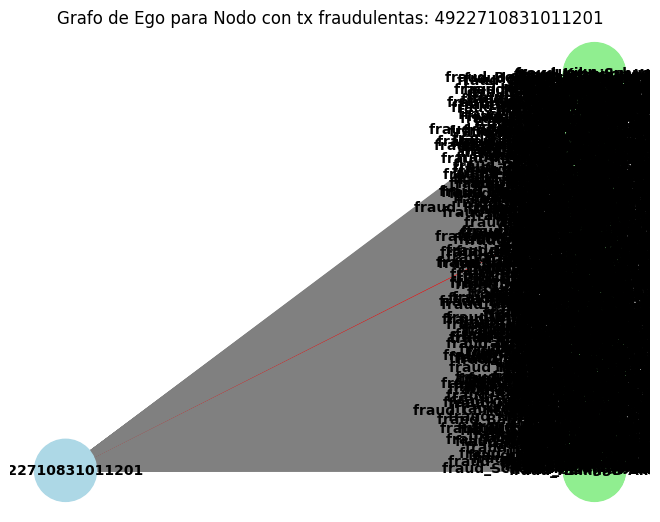

In [16]:
ego_node = fraudulent_nodes[2]  # Select the first fraudulent node

# Create the ego graph
ego_graph = nx.ego_graph(B, ego_node)

# Draw the ego graph with colored edges
pos = nx.bipartite_layout(ego_graph, nodes=[n for n, d in ego_graph.nodes(data=True) if d['bipartite'] == 0])
edge_colors = ['red' if data['is_fraud'] == 1 else 'gray' for u, v, data in ego_graph.edges(data=True)]
nx.draw(ego_graph, pos, with_labels=True,
            node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in ego_graph.nodes(data=True)],
            node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors, width=2)
plt.title(f"Grafo de Ego para Nodo con tx fraudulentas: {ego_node}")
plt.show()

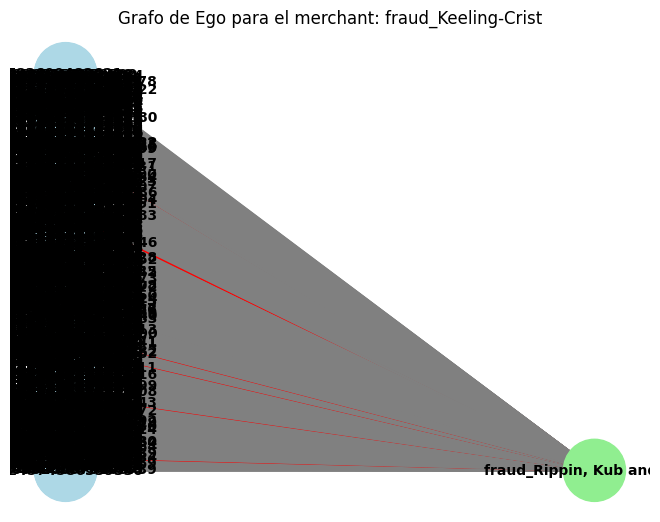

In [42]:
# Find all merchants
merchants = df['merchant'].unique()

ego_graph = nx.ego_graph(B, merchants[0])
# Draw the ego graph with colored edges
pos = nx.bipartite_layout(ego_graph, nodes=[n for n, d in ego_graph.nodes(data=True) if d['bipartite'] == 0])
edge_colors = ['red' if data['is_fraud'] == 1 else 'gray' for u, v, data in ego_graph.edges(data=True)]
nx.draw(ego_graph, pos, with_labels=True,
        node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in ego_graph.nodes(data=True)],
        node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors, width=2)
plt.title(f"Grafo de Ego para el merchant: {merchant}")
plt.show()

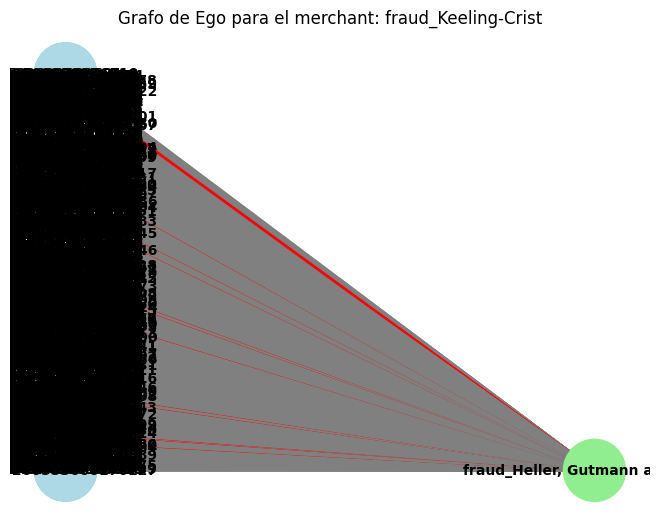

In [43]:
# Find all merchants
merchants = df['merchant'].unique()

ego_graph = nx.ego_graph(B, merchants[1])
# Draw the ego graph with colored edges
pos = nx.bipartite_layout(ego_graph, nodes=[n for n, d in ego_graph.nodes(data=True) if d['bipartite'] == 0])
edge_colors = ['red' if data['is_fraud'] == 1 else 'gray' for u, v, data in ego_graph.edges(data=True)]
nx.draw(ego_graph, pos, with_labels=True,
        node_color=['lightblue' if d['bipartite'] == 0 else 'lightgreen' for n, d in ego_graph.nodes(data=True)],
        node_size=2000, font_size=10, font_color='black', font_weight='bold', edge_color=edge_colors, width=2)
plt.title(f"Grafo de Ego para el merchant: {merchant}")
plt.show()

## Atributos básicos del grafo

In [13]:
# Number of nodes in the bipartite graph B
num_nodes = B.number_of_nodes()
print(f"Número total de nodos: {num_nodes}")

# Separate counts for u and v nodes
u_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 0]
v_nodes = [n for n, d in B.nodes(data=True) if d['bipartite'] == 1]
num_u_nodes = len(u_nodes)
num_v_nodes = len(v_nodes)

print(f"Número de nodos (cc_num): {num_u_nodes}")
print(f"Número de nodos (merchant): {num_v_nodes}")

Número total de nodos: 1676
Número de nodos (cc_num): 983
Número de nodos (merchant): 693


In [14]:
# Calculate total number of edges
total_edges = B.number_of_edges()

# Calculate number of fraudulent edges
fraudulent_edges = sum(1 for u, v, data in B.edges(data=True) if data['is_fraud'] == 1)

# Calculate number of non-fraudulent edges
non_fraudulent_edges = total_edges - fraudulent_edges

print(f"Número total de transacciones: {total_edges}")
print(f"Transacciones fraudulentas: {fraudulent_edges}")
print(f"Transacciones No fraudulentas: {non_fraudulent_edges}")

Número total de transacciones: 479072
Transacciones fraudulentas: 3730
Transacciones No fraudulentas: 475342


In [22]:
#calcular desbalanceo
fraud_ratio = fraudulent_edges / total_edges
print(f"Ratio de transacciones fraudulentas: {fraud_ratio}")

Ratio de transacciones fraudulentas: 0.007785886046356289


###Medidas de centralidad

In [26]:
degree_centrality = nx.centrality.degree_centrality(
   B
)  # save results in a variable to use again
(sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[('fraud_Kilback LLC', 0.515223880597015),
 ('fraud_Boyer PLC', 0.5122388059701493),
 ('fraud_Dickinson Ltd', 0.5074626865671642),
 ('fraud_Kuhn LLC', 0.5026865671641791),
 ('fraud_Cormier LLC', 0.4991044776119403)]

Como era de esperarse, los nodos con mayor grado de centralidad corresponde a nodos de tipo "Comercio". En la celda anterior podemos ver el listado de los 5 comercios en los que más se realizan compras con tarjeta de crédito. Los cuales tienen conexión con el 50% de los nodos de clientes.

In [28]:
(sorted(B.degree, key=lambda item: item[1], reverse=True))[:5]

[('fraud_Kilback LLC', 863),
 ('fraud_Boyer PLC', 858),
 ('fraud_Dickinson Ltd', 850),
 ('fraud_Kuhn LLC', 842),
 ('fraud_Cormier LLC', 836)]

En la celda anterior se puede observar directamente el número de nodos conectados a los 5 nodos con mayor grado de centralidad. El comercio más popular Kilback LLC, está conectado a 863 clientes.

A continuación de calcula el grado de centralidad de los nodos usuarios:

In [46]:
#centralidad de los usuarios
cc_num_degree_centrality = {node: degree for node, degree in degree_centrality.items() if node in df['cc_num'].unique()}
(sorted(cc_num_degree_centrality.items(), key=lambda item: item[1], reverse=True))[:5]

[(2720433095629877, 0.4047761194029851),
 (6534628260579800, 0.4047761194029851),
 (3545109339866548, 0.40298507462686567),
 (6538441737335434, 0.40298507462686567),
 (344709867813900, 0.40238805970149255)]

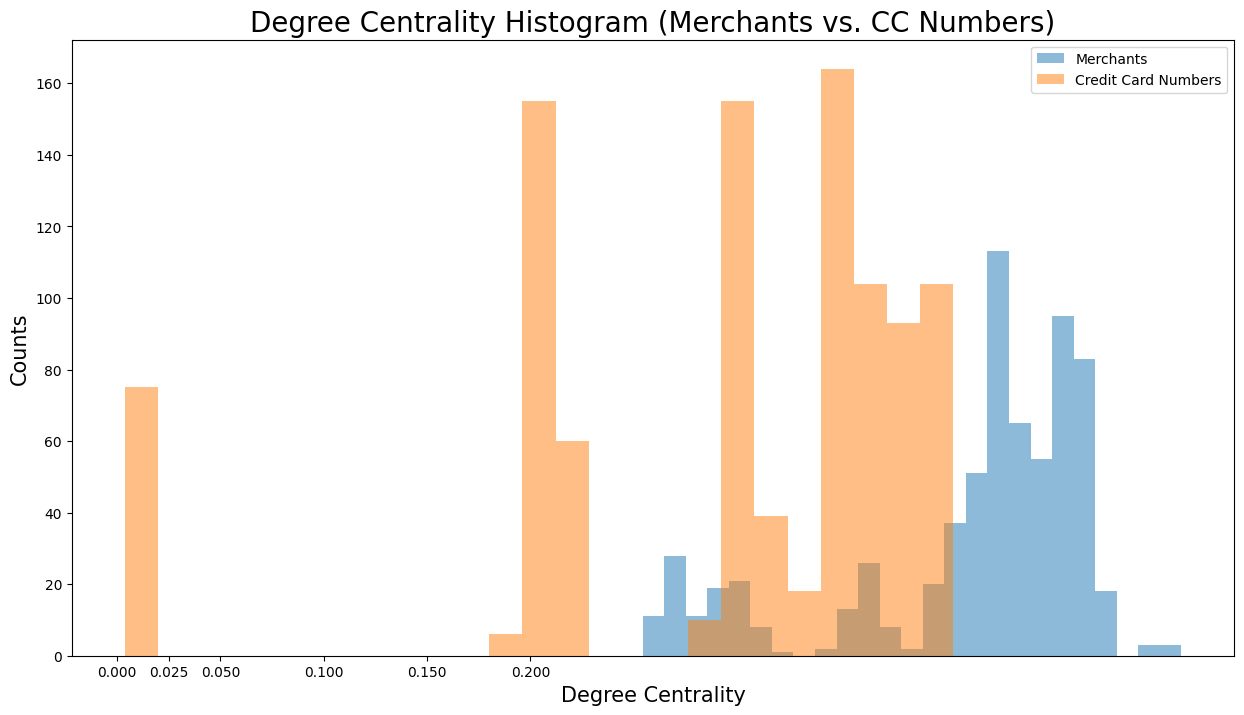

In [47]:
#histograma de degree centrality difererenciado para nodos merchant y cc_num

import matplotlib.pyplot as plt

# Separate degree centralities for merchants and cc_num
merchant_degree_centrality = {node: degree for node, degree in degree_centrality.items() if node in df['merchant'].unique()}
cc_num_degree_centrality = {node: degree for node, degree in degree_centrality.items() if node in df['cc_num'].unique()}

plt.figure(figsize=(15, 8))

# Plot histogram for merchants
plt.hist(merchant_degree_centrality.values(), bins=25, alpha=0.5, label='Merchants')

# Plot histogram for cc_num
plt.hist(cc_num_degree_centrality.values(), bins=25, alpha=0.5, label='Credit Card Numbers')

plt.xticks(ticks=[0, 0.025, 0.05, 0.1, 0.15, 0.2])
plt.title("Degree Centrality Histogram (Merchants vs. CC Numbers)", fontdict={"size": 20})
plt.xlabel("Degree Centrality", fontdict={"size": 15})
plt.ylabel("Counts", fontdict={"size": 15})
plt.legend()
plt.show()

La mayor parte de comercios tienen un grado de centralidad entre 40 y 50%, mientras que los usuarios tienen menor grade centralidad (en su mayoría entre 20 y 40%).

Se puede observar que hay un número significativo de usuarios con grados menores a 2.5 %. Estos son usuarios que tienen una utilización muy baja de sus tarjetas de crédito.

Dado que en un bipartito todos los nodos de un conjunto están a un solo "link" de los nodos del otro conjunto, las demás métricas de centralidad (como la **closeness centrality** y **Betweenness centrality**) no aportan información adicional.

### Coeficiente de clustering bipartito

In [55]:
import networkx as nx

def calcular_coeficiente_clustering_bipartito(grafo_bipartito):

    coeficientes_clustering = {}
    for nodo in grafo_bipartito.nodes():
        vecinos = list(grafo_bipartito.neighbors(nodo))
        if len(vecinos) < 2:  # Se necesita al menos 2 vecinos para calcular el coeficiente
            coeficientes_clustering[nodo] = 0
            continue

        # Número de conexiones entre vecinos
        conexiones_vecinos = 0
        for i in range(len(vecinos)):
            for j in range(i + 1, len(vecinos)):
                if grafo_bipartito.has_edge(vecinos[i], vecinos[j]):
                    conexiones_vecinos += 1

        # Calcular coeficiente de clustering
        max_conexiones = len(vecinos) * (len(vecinos) - 1) / 2
        if max_conexiones > 0:
          coeficientes_clustering[nodo] = conexiones_vecinos / max_conexiones
        else:
          coeficientes_clustering[nodo] = 0

    return coeficientes_clustering


coeficientes = calcular_coeficiente_clustering_bipartito(B)

#imprimir el top 5
(sorted(coeficientes.items(), key=lambda item: item[1], reverse=True))[:5]

[(2703186189652095, 0.0),
 ('fraud_Rippin, Kub and Mann', 0.0),
 (630423337322, 0.0),
 ('fraud_Heller, Gutmann and Zieme', 0.0),
 (38859492057661, 0.0)]

Se puede observar que todos los coeficientes de clustering están dando 0, lo que se debe a que en este grafo no hay conexiones entre los nodos de un mismo conjunto. (Es decir, no hay conexiones entre usuarios o entre comercios)

Bridges

In [57]:
nx.has_bridges(B)

False

También podemos observar que el grafo no tiene puentes (bridges), es decir, la eliminación de cualquier arista no desconectará el grafo.

###Network communities

<ipython-input-60-dbaf6e18587f>:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis', max(partition.values()) + 1)


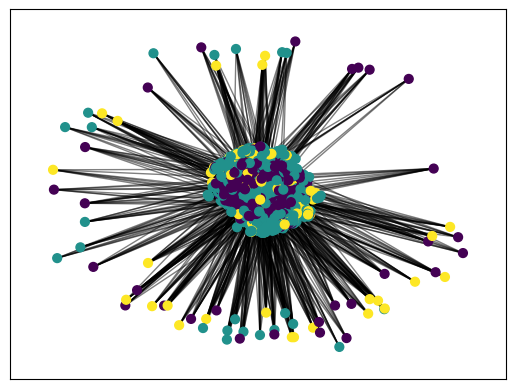

In [60]:
#calcular comunidades con el método de Louvain para bipartitos.

import community as community_louvain

partition = community_louvain.best_partition(B)

modularity = community_louvain.modularity(partition, B)

import matplotlib.pyplot as plt
import matplotlib.cm as cm

pos = nx.spring_layout(B)  # positions for all nodes

# color the nodes according to their partition
cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(B, pos, partition.keys(), node_size=40,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(B, pos, alpha=0.5)
plt.show()

La detección de comunidades aplicada identifica subconjuntos dentro de los dos conjuntos (Usuarios y comercios) que están fuertemente interconectados a través de transacciones.

Estas comunidades pueden consistir en grupos de personas que tienden a transaccionar con los mismos comercios o grupos de comercios que son frecuentados por las mismas personas.

In [62]:
fraudulent_transactions_by_community = df.groupby(df['cc_num'].map(partition))['is_fraud'].sum()

fraudulent_transactions_by_community

,is_fraud
cc_num,
0,2855
1,3606
2,1045


La comunidad con la mayor cantidad de transacciones fraudulentas es la 1 con un número de transacciones fraudulentas de 3606